<div style="text-align: right"> Kevin Le </div>
<div style="text-align: right"> CSE 803 </div>
<div style="text-align: right"> Hw4 </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from test import *
from softmax import *
from train import *
from fitting import lsq
from fooling_images import img_reshape

**Optimization and Fitting** \
For Problem 1, you will work on the same problem as you did in HW3 1.2.6. Instead of using RANSAC to
fit a homography, you need to fit an affine transformation by gradient descent.
$$
y = Sx + t
$$

Implement the Linear layer and L2 loss in layers.py. In forwards propagation, you’ll
store all inputs in cache and save it for backwards propagation. The functions are shown below.
* Linear Layer
$$
y = Sx + t
$$
* L2 Loss Layer
$$
L(x, label) = \frac{1}{N} \sum^{N}_{i=1}(x_{i}-label_{i})^2
$$

In [2]:
def fc_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    
    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).
    
    Inputs:
    - x: A numpy array containing input data, of shape (N, Din)
    - w: A numpy array of weights, of shape (Din, Dout)
    - b: A numpy array of biases, of shape (Dout,)
    
    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    out = x @ w + b.reshape((1,-1))
    cache = (x, w, b)
    return out, cache


def fc_backward(dout, cache):
    """
    Computes the backward pass for a fully_connected layer.
    
    Inputs:
    - dout: Upstream derivative, of shape (N, Dout)
    - cache: returned by your forward function. Tuple of:
      - x: Input data, of shape (N, Din)
      - w: Weights, of shape (Din, Dout)
      - b: Biases, of shape (Dout,)
      
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, Din)
    - dw: Gradient with respect to w, of shape (Din, Dout)
    - db: Gradient with respect to b, of shape (Dout,)
    """
    x, w, b = cache
    dx = dout @ w.T
    dw = x.T @ dout
    db =  dout.sum(axis=0)
    return dx, dw, db

def l2_loss(x, y):
    """
    Computes the loss and gradient of L2 loss.
    loss = 1/N * sum((x - y)**2)

    Inputs:
    - x: Input data, of shape (N, D)
    - y: Output data, of shape (N, D)

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    h = x.shape[0]
    loss =  ((x-y)**2).sum() / h
    dx = (2 * (x-y)) / h

    return loss, dx
    

In [3]:
test_fc()
test_l2_loss()

fc pass!
l2_loss pass!


Implement the gradient descent in fitting.py, report the hyperparameters you choose and
the results you get. Include the figure in your report as well.

[[ 1.00008292e+00 -5.22006229e-03]
 [ 6.41415683e-05  6.14252961e-01]] [-0.00775332 -0.04543341]


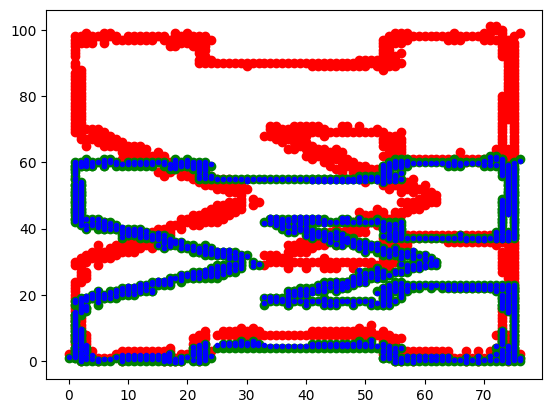

In [4]:
XY = np.load("points_case.npy")
x, y = XY[:,:2], XY[:,2:]
# Tune your learning rate here.
S, t = lsq(x, y, 2e-5)
print(S, t)
y_hat = x.dot(S) + t
plt.scatter(x[:,0],x[:,1],c="red")
plt.scatter(y[:,0],y[:,1],c="green")
plt.scatter(y_hat[:,0],y_hat[:,1],c="blue",marker='.')
plt.savefig("./case.jpg")

I chose $2 \times 10^{-5}$ as my learning rate

**Softmax Classifier with One Layer Neural Network** \
For Problem 2 and Problem 3, you will implement a softmax classifier from scratch to classify images. You
cannot use any deep learning libraries such as PyTorch in this part.
Implement the ReLU layer and softmax layer in layers.py. These functions are shown below:

*ReLU layer
$$ y =   \left\{
\begin{array}{ll}
x, & x \geq 0, \\
0, & otherwise \\
\end{array} 
\right.  
$$
*Softmax layer 
$$
y_i = \frac{e^{x_{i}-max(x)}}{\sum^{C}_{j=1}e^{x_{i}}}
$$
$$
L(y, label) = -\sum^{C}_{i=1}[[i==label]]log(y_{i})
$$

In softmax.py, you need implement your network. You’re only allowed to use layer functions you
implement. However, you’re encouraged to implement additional features in layers.py and use it here.
Filling in all TODOs in skeleton codes will be sufficient. 



In [5]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = np.clip(x, 0, 1000)
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: returned by your forward function. Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx = dout * (cache >= 0)
    return dx

def softmax_loss(x, y):
    # Reference: https://deepnotes.io/softmax-crossentropy
    
    # Computes the loss and gradient for softmax classification.

    # Inputs:
    # - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
    #   class for the ith input.
    # - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    #   0 <= y[i] < C

    # Returns a tuple of:
    # - loss: Scalar giving the loss
    # - dx: Gradient of the loss with respect to x

    h = x.shape[0]
    yi = np.exp(x - np.max(x, axis = 1, keepdims = True)) / \
        np.sum(np.exp(x - np.max(x, axis = 1, keepdims = True)), axis = 1, keepdims = True)
    loss = -np.sum(np.log(yi[range(h), y])) / h

    yi[range(h), y] -= 1
    dx = yi / h
    
    return loss, dx

In [99]:
test_relu()
test_softmax_loss()

relu pass!
softmax_loss pass!


You’ll use L2 regularization in your neural network to prevent overfitting. In order to simplify the expression
of gradient, use the formula $\frac{1}{2}||x||^{2}$
for L2 regularization, where the 2 and the 1
2 will cancel out when you
take the gradient. \

After making sure your network works, you need train it on CIFAR–10 [1] dataset, which is available at
https://www.cs.toronto.edu/∼kriz/cifar-10-python.tar.gz. CIFAR–10 has 10 classes, 50000 training images,
and 10000 test images. You need split the training set/validation set on the training images by yourself. After
decompressing the downloaded dataset, you can use the provided python inferface to read the CIFAR–10
dataset in train.py, although you’re free to modify it. Preprocess your images and tune the model
hyperparameters in train.py.

In [7]:
class SoftmaxClassifier(object):
    """
    A fully-connected neural network with
    softmax loss that uses a modular layer design. We assume an input dimension
    of D, a hidden dimension of H, and perform classification over C classes.

    The architecture should be fc - softmax if no hidden layer.
    The architecture should be fc - relu - fc - softmax if one hidden layer

    Note that this class does not implement gradient descent; instead, it
    will interact with a separate Solver object that is responsible for running
    optimization.

    The learnable parameters of the model are stored in the dictionary
    self.params that maps parameter names to numpy arrays.
    """

    def __init__(self, input_dim=3072, hidden_dim=None, num_classes=10,
                 weight_scale=1e-3, reg=0.0):
        """
        Initialize a new network.

        Inputs:
        - input_dim: An integer giving the size of the input
        - hidden_dim: An integer giving the size of the hidden layer, None
          if there's no hidden layer.
        - num_classes: An integer giving the number of classes to classify
        - weight_scale: Scalar giving the standard deviation for random
          initialization of the weights.
        - reg: Scalar giving L2 regularization strength.
        """
        self.params = {}
        self.reg = reg
        self.hidden_dim = hidden_dim 
        # Initialize 1 layer net
        if self.hidden_dim is None:
          # Set up random weights with Gaussian
          self.params['W1'] = np.random.normal(scale=weight_scale, \
            size=(input_dim, num_classes))
          # Set all biases to zero
          self.params['b1'] = np.zeros(num_classes)

        # Initialize 2 layer net
        else:
          self.params['W1'] = np.random.normal(scale=weight_scale, \
            size=(input_dim, hidden_dim))
          self.params['b1'] = np.zeros(hidden_dim)
          self.params['W2'] = np.random.normal(scale=weight_scale, \
            size=(hidden_dim, num_classes))
          self.params['b2'] = np.zeros(num_classes)

    def forwards_backwards(self, X, y=None, return_dx = False):
        """
        Compute loss and gradient for a minibatch of data.

        Inputs:
        - X: Array of input data of shape (N, Din)
        - y: Array of labels, of shape (N,). y[i] gives the label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return:
        - scores: Array of shape (N, C) giving classification scores, where
          scores[i, c] is the classification score for X[i] and class c.

        If y is not None, then run a training-time forward and backward pass. And
        if  return_dx if True, return the gradients of the loss with respect to 
        the input image, otherwise, return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
          names to gradients of the loss with respect to those parameters.
        """
        scores = None
        fc_c1 = None
        fc_c2 = None
        rl_c = None
        w1 = self.params['W1']
        b1 = self.params['b1']
        w2 = None
        b2 = None
        if self.hidden_dim is None:
          scores, fc_c1 = fc_forward(X, w1, b1)
        else:
          w2 = self.params['W2']
          b2 = self.params['b2']
          s1, fc_c1 = fc_forward(X, w1, b1)
          s2, rl_c = relu_forward(s1)
          scores, fc_c2 = fc_forward(s2, w2, b2)

        # If y is None then we are in test mode so just return scores
        if y is None:
            return scores

        loss, grads = 0, {}
        r = self.reg
        l, dx = softmax_loss(scores, y)
        l += 0.5 * r * (w1 ** 2).sum()
        if not (self.hidden_dim is None):
          dx, grads['W2'], grads['b2'] = fc_backward(dx, fc_c2)
          dx = relu_backward(dx, rl_c)
          grads['W2'] += r * w2
          l += 0.5 * r * (w2 ** 2).sum()

        dx, grads['W1'], grads['b1'] = fc_backward(dx, fc_c1)

        if return_dx:
          return dx

        return loss, grads

    def save(self, filepath):
        with open(filepath, "wb") as fp:   
            pickle.dump(self.params, fp, protocol = pickle.HIGHEST_PROTOCOL) 
            
    def load(self, filepath):
        with open(filepath, "rb") as fp:  
            self.params = pickle.load(fp)  

In [8]:
def train(filepath, r = None, b_size = 128, h_dim = None, l_rate = 5e-3, l_decay = 0.9):
    # load data
    data = load_cifar10() 
    train_data = { k: data[k] for k in ['X_train', 'y_train', 
                                        'X_val', 'y_val']}

    model = None
    # initialize model
    if r is None:
      model = SoftmaxClassifier(hidden_dim = h_dim)
    else:
      model = SoftmaxClassifier(hidden_dim = h_dim, reg=r)
    # start training    
    model, train_acc_history, val_acc_history = trainNetwork(
        model, train_data, learning_rate = l_rate,
        lr_decay=l_decay, num_epochs=20, 
        batch_size=b_size, print_every=1000)

    model.save(filepath)

    # report test accuracy
    acc = testNetwork(model, data['X_test'], data['y_test'])
    print("Test accuracy: {}".format(acc))
    return train_acc_history, val_acc_history


In [9]:
t_acc_1, v_acc_1 = train("Model_1layer")

(Iteration 1 / 6240) loss: 0.000000
(Epoch 0 / 20) train acc: 0.198000; val_acc: 0.192500
(Epoch 1 / 20) train acc: 0.380000; val_acc: 0.383600
(Epoch 2 / 20) train acc: 0.431000; val_acc: 0.385600
(Epoch 3 / 20) train acc: 0.391000; val_acc: 0.391300
(Iteration 1001 / 6240) loss: 0.000000
(Epoch 4 / 20) train acc: 0.413000; val_acc: 0.400800
(Epoch 5 / 20) train acc: 0.447000; val_acc: 0.399600
(Epoch 6 / 20) train acc: 0.434000; val_acc: 0.395600
(Iteration 2001 / 6240) loss: 0.000000
(Epoch 7 / 20) train acc: 0.448000; val_acc: 0.401100
(Epoch 8 / 20) train acc: 0.415000; val_acc: 0.400700
(Epoch 9 / 20) train acc: 0.464000; val_acc: 0.399700
(Iteration 3001 / 6240) loss: 0.000000
(Epoch 10 / 20) train acc: 0.456000; val_acc: 0.406500
(Epoch 11 / 20) train acc: 0.451000; val_acc: 0.404900
(Epoch 12 / 20) train acc: 0.453000; val_acc: 0.402600
(Iteration 4001 / 6240) loss: 0.000000
(Epoch 13 / 20) train acc: 0.430000; val_acc: 0.404500
(Epoch 14 / 20) train acc: 0.419000; val_acc: 0.

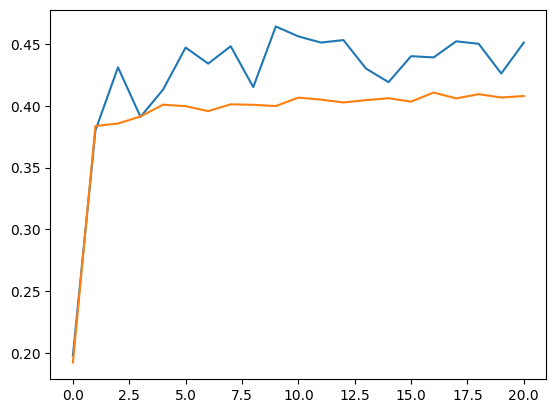

In [10]:
plt.plot(t_acc_1)
plt.plot(v_acc_1)

**2.)** The accuracy of the training and validation is plotted above. The default hyperparameters were used\
**3.)** Test accuracy was 41.1%\
**4.)** No experimentation was used to determine the model since the default hyperparameters were enough to hit the target test accuracy of at least 40%\

**Softmax Classifier with Hidden Layers** 

Continue to work on softmax.py, add a hidden layer with N dimension on your neural network if
hidden dim is set to a positive integer N, there’s no hidden layer if hidden dim=None. Use ReLU
as your activation function.

Use this model to do the classification as you did in Problem 2 again. We expect you to achieve 50%
accuracy on the test set. Also include the number of hidden dimension in your report. The grading checklist
is the same as the one for Problem 2.

Once you finish the training, save the model with highest test accuracy for your next problem, we’ve already
provided save/load functions for you in softmax.py.

In [101]:
t_acc_2, v_acc_2 = train("Model_2layer", h_dim=1000, l_rate=0.1)

(Iteration 1 / 6240) loss: 0.000000
(Epoch 0 / 20) train acc: 0.156000; val_acc: 0.134700
(Epoch 1 / 20) train acc: 0.443000; val_acc: 0.429400
(Epoch 2 / 20) train acc: 0.472000; val_acc: 0.450700
(Epoch 3 / 20) train acc: 0.511000; val_acc: 0.481000
(Iteration 1001 / 6240) loss: 0.000000
(Epoch 4 / 20) train acc: 0.555000; val_acc: 0.493000
(Epoch 5 / 20) train acc: 0.580000; val_acc: 0.502000
(Epoch 6 / 20) train acc: 0.621000; val_acc: 0.509200
(Iteration 2001 / 6240) loss: 0.000000
(Epoch 7 / 20) train acc: 0.611000; val_acc: 0.484400
(Epoch 8 / 20) train acc: 0.681000; val_acc: 0.527100
(Epoch 9 / 20) train acc: 0.693000; val_acc: 0.535900
(Iteration 3001 / 6240) loss: 0.000000
(Epoch 10 / 20) train acc: 0.687000; val_acc: 0.533900
(Epoch 11 / 20) train acc: 0.691000; val_acc: 0.533600
(Epoch 12 / 20) train acc: 0.728000; val_acc: 0.527500
(Iteration 4001 / 6240) loss: 0.000000
(Epoch 13 / 20) train acc: 0.736000; val_acc: 0.539400
(Epoch 14 / 20) train acc: 0.774000; val_acc: 0.

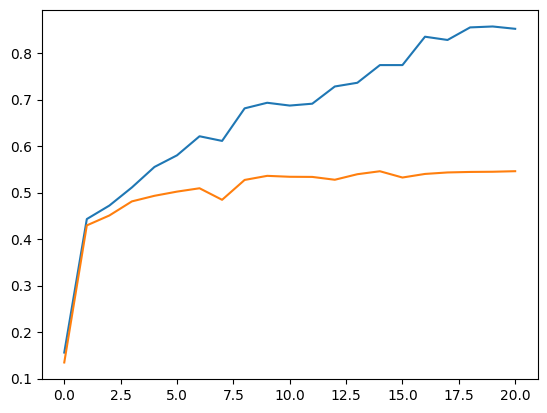

In [102]:
plt.plot(t_acc_2)
plt.plot(v_acc_2)

**2.)** The accuracy of the training and validation is plotted above. Hidden dimension of 1000 was used and the learning rate was set to 0.1\
**3.)** Test accuracy was 54.5%\
**4.)** Hidden dimension was set to 1000 arbitarily as a baseline. The default learning rate ($10^{-3}$) was first used, and after training it was seen that the test accuracy was too low. The learning rate was then set to 0.01 as a step in magnitude, however the accuracy was still too low. When set to 0.01, the accuracy was then within the target of 50%\

**Fooling Images** 

Fooling images is a good way to see where the model works and fails, it’s highly related to another important
field of machine learning: adversarial attack and robustness. In the following example, a few spots on the
image will make the model to misclassify this ship image as airplane although it still looks like a ship. 
In this part, you will use gradient ascent to generate a fooling image from a correctly classified image from
CIFAR-10


Finish the remaining code in softmax.py, return the gradient of loss with respect to the input if
return dx flag is True.

Return of Gradient can be seen in the implementation

Gradient ascent is similar to gradient descent. You’ll fix the parameters of the model and
compute the gradient of the classification score with respect to the input image and update the image
iteratively. In this problem, you will use a fooling class to compute the gradient of loss with respect to
the input image instead, in which way you’re doing gradient descent to minimize the loss but gradient
ascent to maximize the classification score of that fooling class.
You will implement the following steps in fooling image.py

• load the trained model you get from the last problem.

• load an image that is correctly classified by your model, choose a different class as the fooling
class, fix the model parameters and compute the gradient of the loss with respect to your input
image.

• update your input image with the gradient, repeat this process until your model classifies the
input image as the fooling class.

Include the original image, the fooling image and their difference in your report, you can magnify the
difference if it’s too small. Comment on the robustness of your model

In [84]:
def gradient_ascent(model, target_class, init, learning_rate=1e-3):
    """
    Inputs:
    - model: Image classifier.
    - target_class: Integer, representing the target class the fooling image
      to be classified as.
    - init: Array, shape (1, Din), initial value of the fooling image.
    - learning_rate: A scalar for initial learning rate.
    
    Outputs:
    - image: Array, shape (1, Din), fooling images classified as target_class
      by model
    """
    
    img = init.copy().astype(float)
    img /= 255
    y = np.array([target_class])

    for i in range(100):
      dx = model.forwards_backwards(img, y, True)
      img += (dx * learning_rate)
      if model.forwards_backwards(img).argmax(axis=1) == y: 
        img *= 255
        img = img.astype(int)
        return img 
    else:
      return None

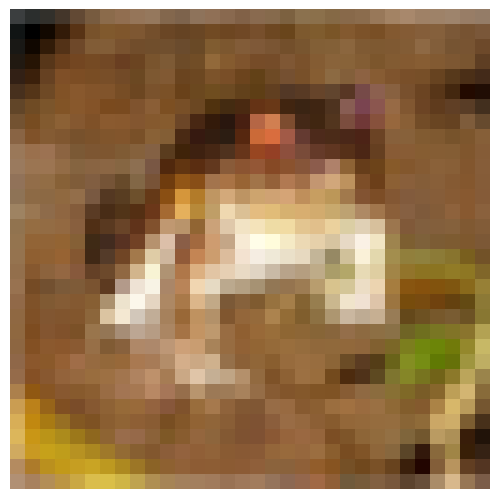

In [103]:
# Initialize your own model
model = SoftmaxClassifier(hidden_dim=1000, reg=0.1)

# Set up gradient ascent
b1 = unpickle("cifar-10-batches-py/data_batch_1")
img = b1['data'][0].reshape([1,3072])
target_class = b1['labels'][1]
model.load("Model_2layer")
f_img = gradient_ascent(model, target_class, init=img, learning_rate=1)

# Save and show images
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(img_reshape(img))
plt.savefig("initial.jpg", bbox_inches='tight')

Initial Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


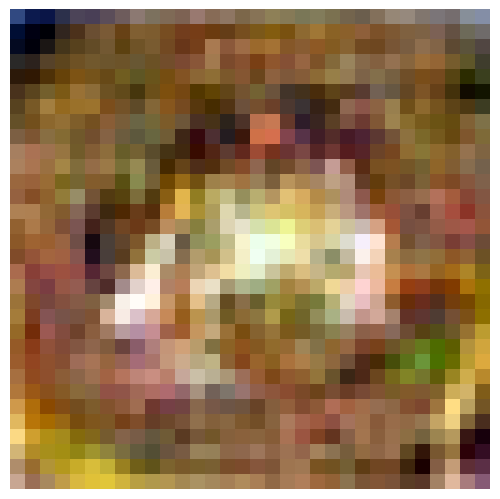

In [104]:
if f_img is not None:
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(img_reshape(f_img))
    plt.savefig("fool.jpg", bbox_inches='tight')
else:
    print("Didn't find fooling image")

Fooled Image

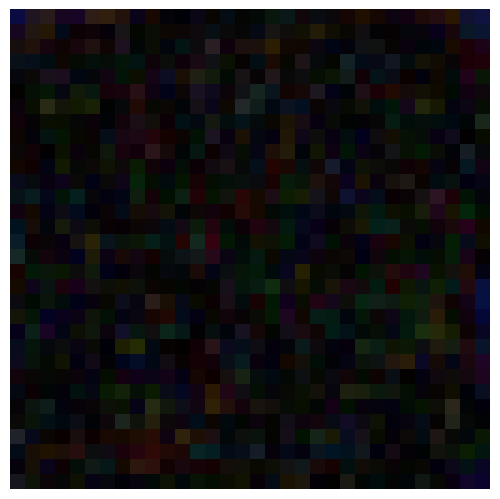

In [105]:
if f_img is not None:
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    difference = (img - f_img).astype(int)
    plt.imshow(img_reshape(np.abs(difference)))
    plt.savefig("dif.jpg", bbox_inches='tight')
else:
    print("Didn't find fooling image")

Difference